In [1]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from sklearn import metrics

from sklearn.metrics import classification_report
from scipy import linalg as scipy_linalg
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

import itertools


In [2]:
prosody_data = pd.read_csv('Prosodic_Features_MRH.csv',sep=",")
#expr = pd.read_csv(expr_file, sep="\t")
y = prosody_data['Hired3C'].values
#36
#X =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD']]
#49X =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD', 'f3STD', 'f2STDf1', 'f2STDf2', 'jitter', 'shimmer', 'jitterRap', 'meanPeriod', 'percentUnvoiced', 'numVoiceBreaks', 'PercentBreaks', 'speakRate', 'numPause', 'maxDurPause']]
#25X = prosody_data[['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean', 'jitter', 'intensitySD', 'intensityQuant', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1', 'pitch_abs', 'f2STDf2', 'avgBand1', 'percentUnvoiced', 'AvgTotRis:3']]
X = prosody_data.iloc[:, 6:].values

X = StandardScaler().fit_transform(X)
#X = MinMaxScaler().fit_transform(X)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
pca.fit(X)
X_pca = pca.transform(X)
principalDf = pd.DataFrame(data = X_pca , columns = ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20','PC21', 'PC22','PC23', 'PC24','PC25'])
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-0.692918,0.685098,-0.364534,-0.295984,-0.199671,-0.119706,-0.064272,0.107715,0.010683,0.011549,...,0.033984,0.027896,-0.120267,-0.123190,-0.279014,-0.030345,-0.031081,0.040511,-0.006124,-0.035574
1,-0.753818,0.647446,-0.444903,-0.416003,-0.273987,-0.100499,-0.143152,0.152431,-0.033701,0.082542,...,-0.051552,0.128479,0.002374,-0.144448,-0.251815,0.100197,-0.039564,0.097527,-0.033825,0.016212
2,-0.655107,0.681262,-0.289378,-0.299772,0.038593,-0.109086,-0.244566,0.177346,-0.090378,0.015818,...,-0.038732,0.245304,-0.059516,-0.255164,-0.140905,-0.003871,0.092548,0.113161,0.052736,-0.089075
3,-0.435551,-0.059835,0.440370,-0.898822,0.513097,-0.349614,-0.591225,-0.109355,0.091131,0.045074,...,-0.071321,0.350818,-0.113005,-0.045958,0.043120,0.189523,0.014996,0.132203,-0.115639,0.005501
4,-0.413051,-0.004898,0.509778,-0.742404,0.208906,-0.287548,-0.517068,-0.135435,0.177530,0.000200,...,-0.039172,0.261332,-0.058636,-0.057109,0.020498,0.156747,-0.016800,0.138250,-0.179067,0.093943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,0.810759,0.264550,-0.641180,-0.734969,0.215605,0.102423,0.030575,-0.062887,-0.215410,-0.005058,...,0.080727,0.178152,-0.088722,0.041802,-0.085061,-0.032335,-0.062554,0.073359,-0.001346,0.111075
676,0.766963,0.434614,-0.795144,-0.535864,-0.001188,0.216450,0.031868,0.053700,-0.196559,0.013821,...,-0.013980,-0.001574,0.122430,-0.140203,-0.142817,-0.008898,-0.021138,0.206536,0.029052,0.144971
677,0.864723,0.123206,-0.531445,-0.870132,0.426856,-0.102013,0.108357,-0.377542,-0.122371,-0.283178,...,-0.046423,0.230259,-0.027055,0.109464,-0.146216,0.038154,0.007096,0.226541,0.008123,0.051280
678,0.910977,0.535527,-0.670594,-0.157994,0.485442,0.146686,-0.043265,-0.124458,-0.097262,-0.057348,...,-0.043671,0.039400,0.021273,-0.080578,-0.165116,0.013067,-0.026326,0.203659,0.071344,0.045116


In [4]:
finalDf = pd.concat([principalDf, prosody_data[['Hired3C']]], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,Hired3C
0,-0.692918,0.685098,-0.364534,-0.295984,-0.199671,-0.119706,-0.064272,0.107715,0.010683,0.011549,...,0.027896,-0.120267,-0.123190,-0.279014,-0.030345,-0.031081,0.040511,-0.006124,-0.035574,1
1,-0.753818,0.647446,-0.444903,-0.416003,-0.273987,-0.100499,-0.143152,0.152431,-0.033701,0.082542,...,0.128479,0.002374,-0.144448,-0.251815,0.100197,-0.039564,0.097527,-0.033825,0.016212,1
2,-0.655107,0.681262,-0.289378,-0.299772,0.038593,-0.109086,-0.244566,0.177346,-0.090378,0.015818,...,0.245304,-0.059516,-0.255164,-0.140905,-0.003871,0.092548,0.113161,0.052736,-0.089075,1
3,-0.435551,-0.059835,0.440370,-0.898822,0.513097,-0.349614,-0.591225,-0.109355,0.091131,0.045074,...,0.350818,-0.113005,-0.045958,0.043120,0.189523,0.014996,0.132203,-0.115639,0.005501,1
4,-0.413051,-0.004898,0.509778,-0.742404,0.208906,-0.287548,-0.517068,-0.135435,0.177530,0.000200,...,0.261332,-0.058636,-0.057109,0.020498,0.156747,-0.016800,0.138250,-0.179067,0.093943,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,0.810759,0.264550,-0.641180,-0.734969,0.215605,0.102423,0.030575,-0.062887,-0.215410,-0.005058,...,0.178152,-0.088722,0.041802,-0.085061,-0.032335,-0.062554,0.073359,-0.001346,0.111075,0
676,0.766963,0.434614,-0.795144,-0.535864,-0.001188,0.216450,0.031868,0.053700,-0.196559,0.013821,...,-0.001574,0.122430,-0.140203,-0.142817,-0.008898,-0.021138,0.206536,0.029052,0.144971,0
677,0.864723,0.123206,-0.531445,-0.870132,0.426856,-0.102013,0.108357,-0.377542,-0.122371,-0.283178,...,0.230259,-0.027055,0.109464,-0.146216,0.038154,0.007096,0.226541,0.008123,0.051280,0
678,0.910977,0.535527,-0.670594,-0.157994,0.485442,0.146686,-0.043265,-0.124458,-0.097262,-0.057348,...,0.039400,0.021273,-0.080578,-0.165116,0.013067,-0.026326,0.203659,0.071344,0.045116,0


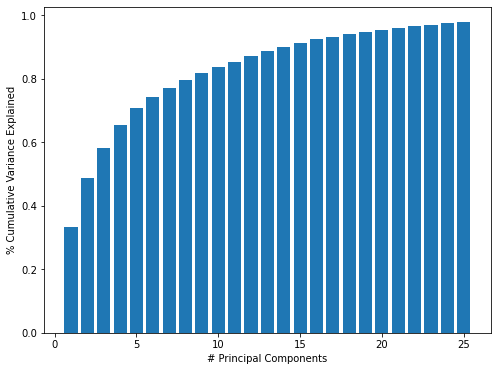

In [5]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,26), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

In [6]:
def CreateModel( X_train, X_test, y_train, y_test):
    y_21_test = []
    for i in y_test:
        if(i == 2):
            y_21_test.append(2)
        else:
            y_21_test.append(1)

    y_21_train = []
    for i in y_train:
        if(i == 2):
            y_21_train.append(2)
        else:
            y_21_train.append(1)

    X = X_train
    y = y_21_train
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(X, y)
    clf.score(X, y)
    #AdaBoostClassifier(n_estimators=100, random_state=0)
    y_21_predict=clf.predict(X_test)
    target_names = ['class 2', 'class 1']      
    print(classification_report(y_21_test,y_21_predict,target_names=target_names, zero_division=0))

    X_10_train = X_train.loc[y_train!= 2]
    X_10_test = X_test.loc[y_test!= 2]

    #select from y_train where y value is not 2
    y_10_train= []
    for i in y_train:
        if(i != 2):
            y_10_train.append(i)

    #select from y_test where y value is not 2
    y_10_test = []
    for i in y_test:
        if(i != 2):
            y_10_test.append(i)

    X = X_10_train
    y = y_10_train
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(X, y)
    clf.score(X, y)
    y_10_predict = clf.predict(X_10_test)
    target_names = ['class 1', 'class 0']      
    print(classification_report(y_10_test,y_10_predict ,target_names=target_names, zero_division=0))

    y1=list(y_test)
    y2=list(y_21_predict)
    y3=list(y_10_predict)
    combined_Predictions = []
    k=0
    for (i,j) in zip(y1,y2):
        if(i!=2):
            combined_Predictions.append(y3[k])
            k=k+1
        else:
            combined_Predictions.append(j)
    #target_names = ['class 0', 'class 1', 'class 2']
    #print(classification_report(y_test,combined_Predictions ,target_names=target_names, zero_division=0))
    acc = accuracy_score(y_test, combined_Predictions, normalize=True)

    return acc 


In [7]:
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=12)
cvscores =[]
X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20','PC21', 'PC22','PC23', 'PC24','PC25']]
y=finalDf['Hired3C']
for train_index, test_index in skf.split(X, y):


    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    scores = CreateModel( X_train, X_test, y_train, y_test)
    
    
    cvscores.append(scores*100)
print(cvscores ) 
print("CV Score: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


              precision    recall  f1-score   support

     class 2       0.98      1.00      0.99        46
     class 1       1.00      0.95      0.98        22

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.98        68
weighted avg       0.99      0.99      0.99        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        23

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

              precision    recall  f1-score   support

     class 2       1.00      1.00      1.00        46
     class 1       1.00      1.00      1.00        22

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68

              preci